<a href="https://colab.research.google.com/github/shahchhatru/Computer_vision_projects/blob/main/OpenCVbasicsofImageProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Opencv basics

1. Loading images
2. Display images
3. Save images
4. Getting the image dimensions


This is how we import OpenCV, we can't use OpenCV's functions without first doing this
 I am running on colab so I don't need to install opencv
 if you are running locally install it.

In [1]:


import cv2
import os

Let's see what version we're running


In [2]:

print(cv2.__version__)

4.8.0


## **Dowloading Images**

If using Google Colab, we'll have to **upload our image**.

Colab is a Jupyther Notebook environment that runs on the **cloud** using Google's servers. As such, any file we wish to use needs to be uploaded to their servers.

just upload your images to the runtime
click on the folder icon and upload it to the section

or if you want to use ur gdrive then connect to it
with the following code

```python
from google.colab import drive
drive.mount('/content/drive')

```

Here I will just upload few images to runtime.


I downloaded some images from unsplash.com


In [3]:
import requests

def download_image(url, save_path):
    response = requests.get(url)
    if response.status_code == 200:
        with open(save_path, 'wb') as f:
            f.write(response.content)
        print(f"Image downloaded successfully and saved as {save_path}")
    else:
        print("Failed to download image")



In [4]:


image_url = 'https://plus.unsplash.com/premium_photo-1700583711916-3a5da557b4ac?w=500&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxlZGl0b3JpYWwtZmVlZHw3fHx8ZW58MHx8fHx8'  # Replace this with the actual image URL
save_path = 'downloaded_image.jpg'            # Specify the path where you want to save the image

download_image(image_url, save_path)

Image downloaded successfully and saved as downloaded_image.jpg


In [5]:
os.listdir()

['.config',
 'photo-1683009686716-ac2096a5a73b?w=500',
 'downloaded_image.jpg',
 'photo-1683009686716-ac2096a5a73b?w=500.1.tmp',
 'neom-nEDEGCXh6VU-unsplash.jpg',
 'woman-climbing.png',
 'sample_data']

In [6]:
import glob
files=glob.glob("*.jpg")
files

['downloaded_image.jpg', 'neom-nEDEGCXh6VU-unsplash.jpg']

### loading the image

 Load an image using 'imread' specifying the path to image

In [7]:

image = cv2.imread(files[0])

In [8]:
image

array([[[209, 212, 210],
        [209, 212, 210],
        [209, 212, 210],
        ...,
        [106, 141, 184],
        [105, 140, 183],
        [104, 139, 182]],

       [[211, 214, 212],
        [211, 214, 212],
        [211, 214, 212],
        ...,
        [106, 141, 184],
        [105, 140, 183],
        [104, 139, 182]],

       [[214, 217, 215],
        [214, 217, 215],
        [213, 216, 214],
        ...,
        [106, 141, 184],
        [105, 140, 183],
        [104, 139, 182]],

       ...,

       [[202, 202, 202],
        [202, 202, 202],
        [202, 202, 202],
        ...,
        [192, 192, 192],
        [193, 193, 193],
        [194, 194, 194]],

       [[201, 201, 201],
        [201, 201, 201],
        [202, 202, 202],
        ...,
        [190, 190, 190],
        [191, 191, 191],
        [192, 192, 192]],

       [[201, 201, 201],
        [201, 201, 201],
        [201, 201, 201],
        ...,
        [189, 189, 189],
        [190, 190, 190],
        [191, 191, 191]]

In [9]:
type(image), image.dtype, image.shape

(numpy.ndarray, dtype('uint8'), (333, 500, 3))

### displaying the image
Show the image with matplotlib
by default opencv loads image BGR format and plt renders it in RGB format





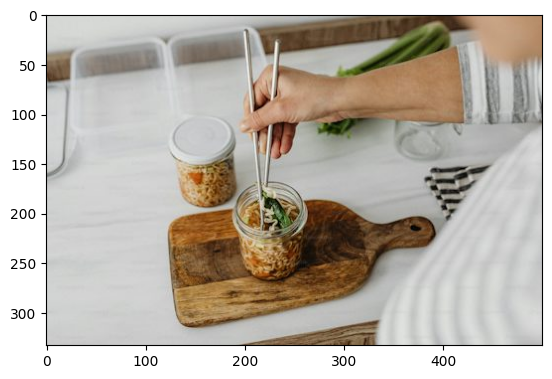

In [10]:
from matplotlib import pyplot as plt


plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

if we don't use cv2.color

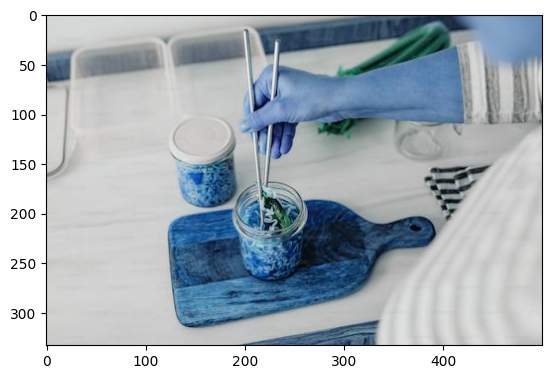

In [11]:

plt.imshow(image)
plt.show()

Let's create a simple function to make displaying our images simpler and easier

In [12]:
def imshow(title = "", image = None):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

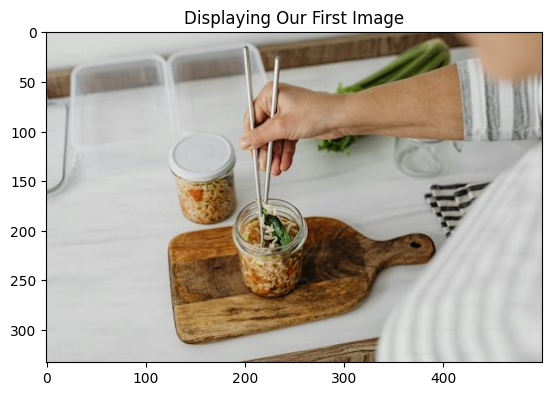

In [13]:
# Let's test it out
imshow("Displaying Our First Image", image)

### **Saving Images**

In [14]:
# Simply use 'imwrite' specificing the file name and the image to be saved
cv2.imwrite('output.jpg', image)

True

In [15]:
# Or save it as a PNG (Portable Network Graphics) which is a Lossless bitmap image format
cv2.imwrite('output.png', image)

True

### **Displaying Image Dimensions**

Remember Images are arrays:

![](https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/array.png?token=ADLZD2HNEL33JAKTYRM3B5C7WMIV4)



In [16]:
# Import numpy
import numpy as np

print(image.shape)

(333, 500, 3)


In [17]:
# To access a dimension, simply index it by using 0, 1 or 2.
image.shape[0]

333

In [18]:
print('Height of Image: {} pixels'.format(int(image.shape[0])))
print('Width of Image: {} pixels'.format(int(image.shape[1])))
print('Depth of Image: {} colors components'.format(int(image.shape[2])))

Height of Image: 333 pixels
Width of Image: 500 pixels
Depth of Image: 3 colors components


# **Grayscaling Images**

In the section below, we'll learn to:
1. Convert a color image to grayscale
2. See the change in dimensions between grayscale and color images


In [19]:

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [20]:
files

['downloaded_image.jpg', 'neom-nEDEGCXh6VU-unsplash.jpg']

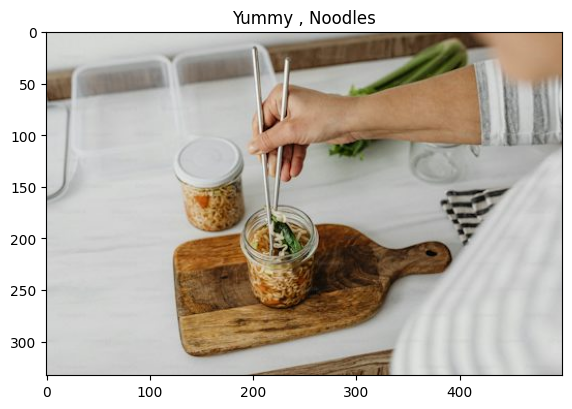

In [22]:
# Load our input image
image = cv2.imread(files[0])

imshow("Yummy , Noodles", image)

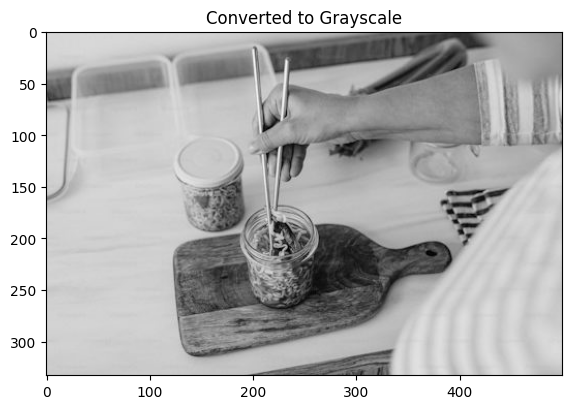

In [23]:
# We use cvtColor, to convert to grayscale
# It takes 2 arguments, the first being the input image
# The second being the color space conversion code
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

imshow("Converted to Grayscale", gray_image)

### **Grayscale Image Dimensions**

Remember RGB color images have 3 dimensions, one for each primary color. Grayscale just has 1, which is the intensity of gray.

![](https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/gray.png)

In [24]:
image.shape

(333, 500, 3)

In [25]:
gray_image.shape

(333, 500)


# **Color Spaces**


1. View the individual channels of an RGB Image
2. Manipulate a color space
3. Introduce HSV Color Spaces

In [26]:
# Load our input image
image = cv2.imread(files[0])

# Use cv2.split to get each color space separately
B, G, R = cv2.split(image)
print(B.shape)
print(G.shape)
print(R.shape)

(333, 500)
(333, 500)
(333, 500)


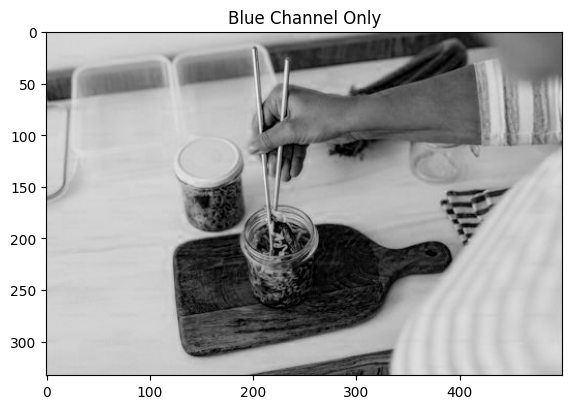

In [27]:
# Each color space on it's on will look like a grayscale as it lacks the other color channels
imshow("Blue Channel Only", B)

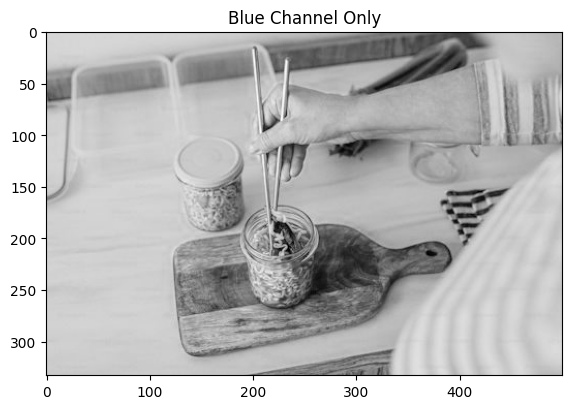

In [28]:
# Each color space on it's on will look like a grayscale as it lacks the other color channels
imshow("Blue Channel Only", R)

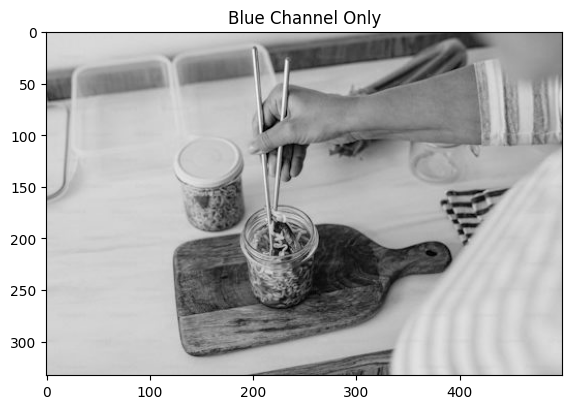

In [29]:
# Each color space on it's on will look like a grayscale as it lacks the other color channels
imshow("Blue Channel Only", G)

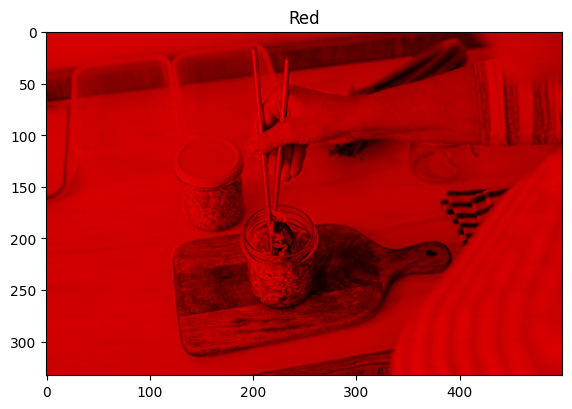

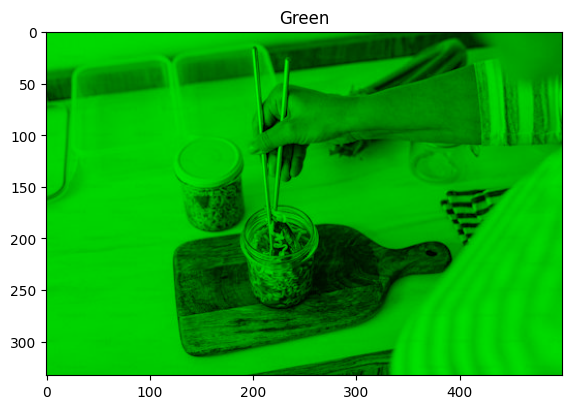

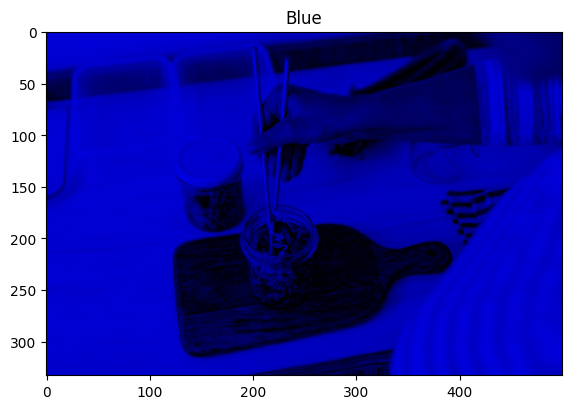

In [30]:
import numpy as np

# Let's create a matrix of zeros
# with dimensions of the image h x w
zeros = np.zeros(image.shape[:2], dtype = "uint8")

imshow("Red", cv2.merge([zeros, zeros, R]))
imshow("Green", cv2.merge([zeros, G, zeros]))
imshow("Blue", cv2.merge([B, zeros, zeros]))

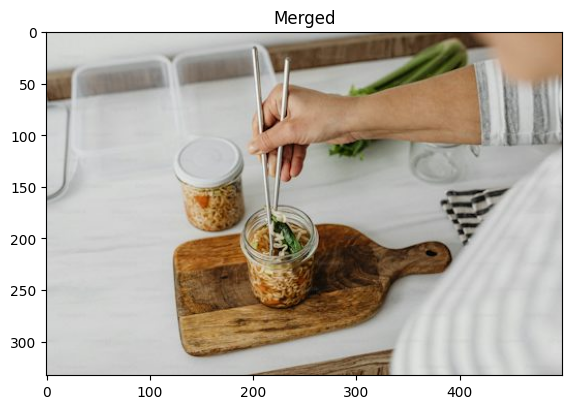

In [31]:
image = cv2.imread(files[0])

# OpenCV's 'split' function splites the image into each color index
B, G, R = cv2.split(image)

# Let's re-make the original image,
merged = cv2.merge([B, G, R])
imshow("Merged", merged)

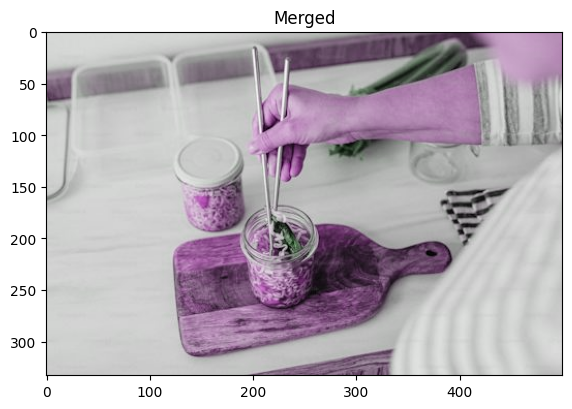

In [32]:
## let's have some fun

# Let's re-make the original image,
merged = cv2.merge([R, G, R])
imshow("Merged", merged)

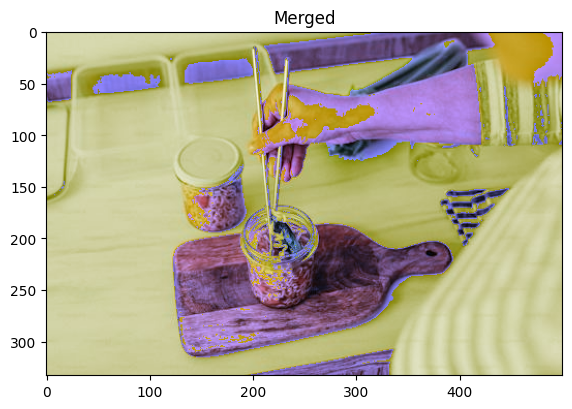

In [33]:
# Let's re-make the original image,
merged = cv2.merge([B+G, G, R])
imshow("Merged", merged)

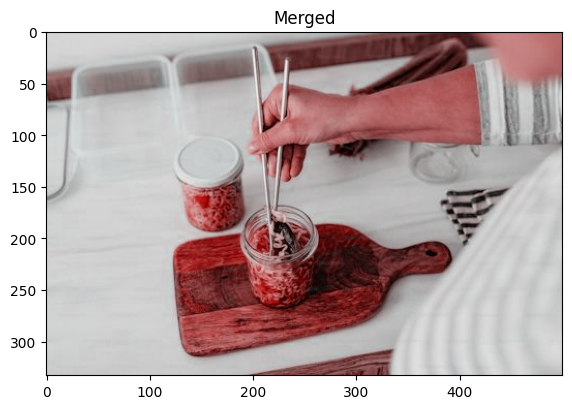

In [34]:
# Let's re-make the original image,
merged = cv2.merge([B, B, R])
imshow("Merged", merged)

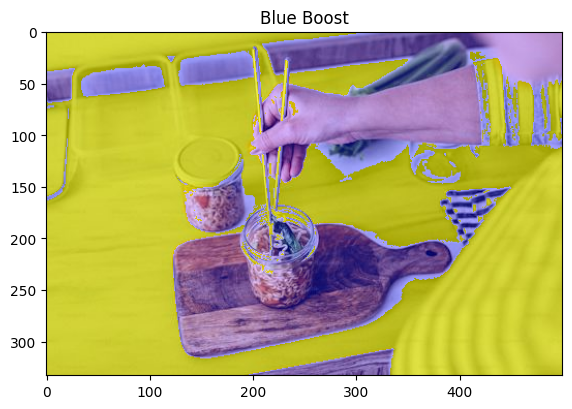

In [35]:
# Let's amplify the blue color
merged = cv2.merge([B+100, G, R])
imshow("Blue Boost", merged)

## **The HSV Color Space**

![](https://upload.wikimedia.org/wikipedia/commons/f/f2/HSV_color_solid_cone.png)

- Hue: 0 - 179
- Saturation: 0 - 255
- Value (Intensity): 0 - 255

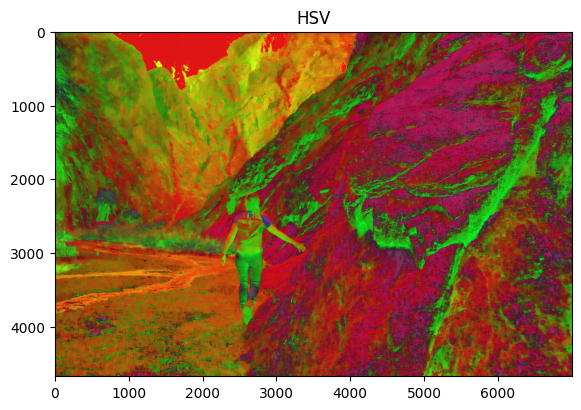

In [36]:
# Reload our image
image = cv2.imread(files[1])

# Convert to HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
imshow('HSV', hsv_image)

#### This looks odd....why?

Because our plotting function was designed for RGB only images, not HSV

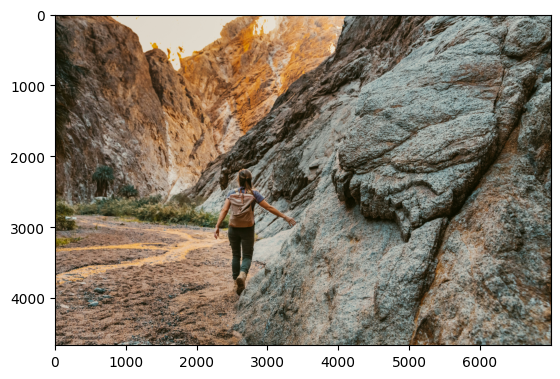

In [37]:
plt.imshow(cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB))
plt.show()

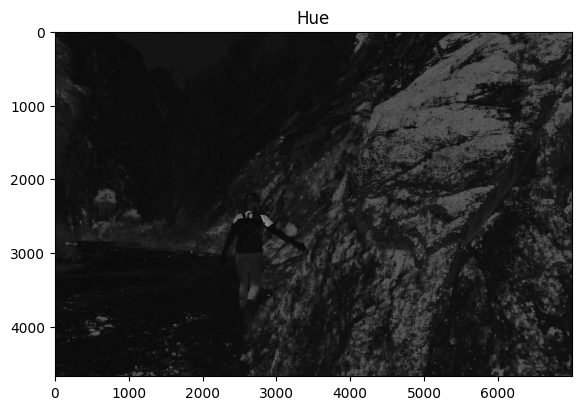

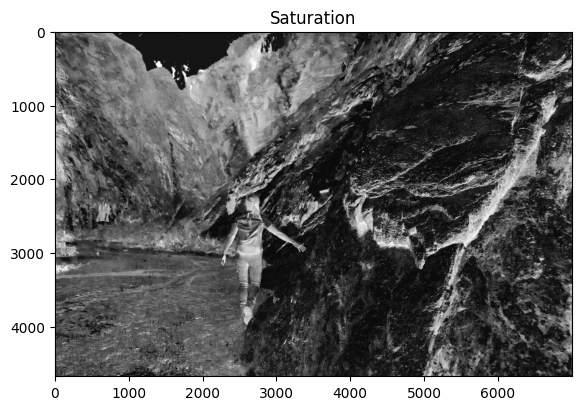

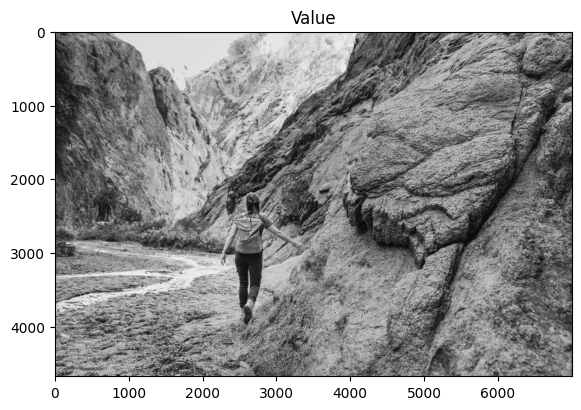

In [38]:
# Switching back to viewing the RGB representation
imshow("Hue", hsv_image[:, :, 0])
imshow("Saturation", hsv_image[:, :, 1])
imshow("Value", hsv_image[:, :, 2])